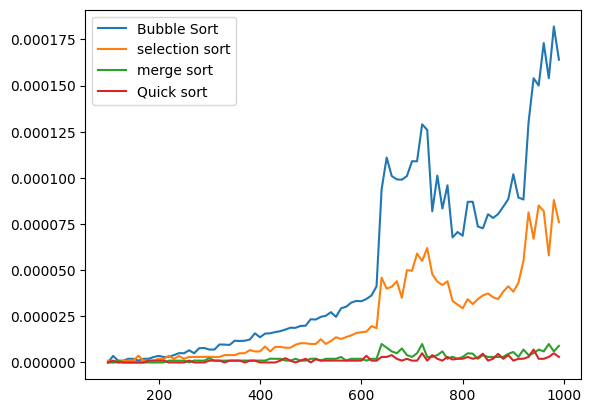

In [1]:
import random
import time
import matplotlib.pyplot as plt

# Bubble Sort implementation
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

# Insertion Sort implementation
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j] :
                arr[j+1] = arr[j]
                j -= 1
        arr[j+1] = key

# Merge Sort implementation
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Quick Sort implementation
def quick_sort(arr, low, high):
    if low < high:
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i+1], arr[high] = arr[high], arr[i+1]
        pi = i+1

        quick_sort(arr, low, pi-1)
        quick_sort(arr, pi+1, high)

# generate a range of array sizes to test
array_sizes = range(100, 1000, 10)

# measure the time taken to sort arrays of increasing sizes with each algorithm
bubble_times = []
insertion_times = []
merge_times = []
quick_times = []

for size in array_sizes:
    arr = [random.randint(1, 1000) for _ in range(size)]

    # measure time for Bubble Sort
    start_time = time.time()/1000
    bubble_sort(arr.copy())
    end_time = time.time()/1000
    bubble_times.append(end_time - start_time)

    # measure time for Insertion Sort
    start_time = time.time()/1000
    insertion_sort(arr.copy())
    end_time = time.time()/1000
    insertion_times.append(end_time - start_time)

    # measure time for Merge Sort
    start_time = time.time()/1000
    merge_sort(arr.copy())
    end_time = time.time()/1000
    merge_times.append(end_time - start_time)

    # measure time for Quick Sort
    start_time = time.time()/1000
    quick_sort(arr.copy(), 0, size-1)
    end_time = time.time()/1000
    quick_times.append(end_time - start_time)

# plot a graph of array size vs. time taken for each algorithm
plt.plot(array_sizes, bubble_times, label='Bubble Sort')
plt.plot(array_sizes, insertion_times, label='selection sort')
plt.plot(array_sizes, merge_times, label='merge sort')
plt.plot(array_sizes, quick_times, label='Quick sort')
plt.legend()


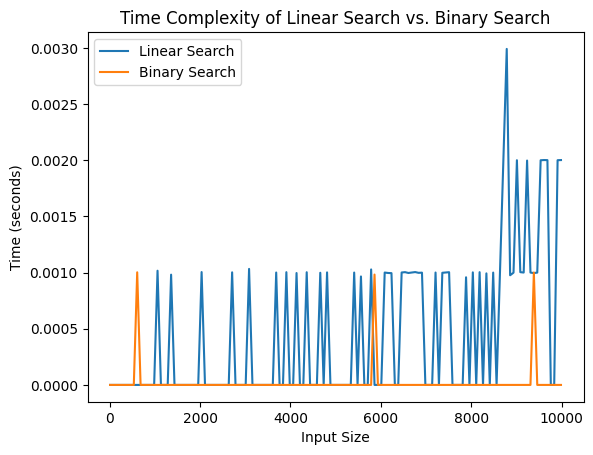

In [13]:
import time
import random
import matplotlib.pyplot as plt

def linear_search(arr, x):
    comparisons = 0
    for i in range(len(arr)):
        comparisons += 1
        if arr[i] == x:
            return comparisons
    return comparisons

def binary_search(arr, x):
    comparisons = 0
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        comparisons += 1
        if arr[mid] == x:
            return comparisons
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return comparisons

# Generate data for the graphs
input_sizes = list(range(10, 10001, 75))
linear_search_times = []
binary_search_times = []

for size in input_sizes:
    arr = list(range(size))
    x = random.randint(0, size-1)
    start_time = time.time()
    linear_search(arr, x)
    end_time = time.time()
    linear_search_times.append(end_time - start_time)

    start_time = time.time()
    binary_search(arr, x)
    end_time = time.time()
    binary_search_times.append(end_time - start_time)

# Plot the graphs
plt.plot(input_sizes, linear_search_times, label='Linear Search')
plt.plot(input_sizes, binary_search_times, label='Binary Search')
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Linear Search vs. Binary Search')
plt.legend()
plt.show()


In [2]:
# Hybridised Quick Sort

# Time Complexity: O(nlogn)
# Space Complexity: O(n)
# Auxiliary Space: O(n)
import random

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key

def quick_sort(arr, low, high):
    if low < high:
        if high - low <= 10: # Use insertion sort for small subarrays
            insertion_sort(arr[low:high+1])
        else:
            pivot = partition(arr, low, high)
            quick_sort(arr, low, pivot-1)
            quick_sort(arr, pivot+1, high)

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i+1

# Compare the average time for normal Quick Sort and hybridized Quick Sort
import statistics

n = 100000

normal_times = []
hybrid_times = []

for i in range(10):
    arr = [random.randint(1, n) for _ in range(n)]

    start_time = time.time()
    quick_sort(arr, 0, n-1)
    normal_times.append(time.time() - start_time)

    arr = [random.randint(1, n) for _ in range(n)]
    start_time = time.time()
    quick_sort(arr, 0, n-1)
    hybrid_times.append(time.time() - start_time)

print("Average time for normal Quick Sort:", statistics.mean(normal_times))
print("Average time for hybridized Quick Sort:", statistics.mean(hybrid_times))


Average time for normal Quick Sort: 0.37798659801483153
Average time for hybridized Quick Sort: 0.38359220027923585


In [3]:
import random

def kthSmallest(arr1, arr2, k):
    m, n = len(arr1), len(arr2)
    i, j = 0, 0
    while i < m and j < n and k > 0:
        if arr1[i] < arr2[j]:
            i += 1
        else:
            j += 1
        k -= 1
    while i < m and k > 0:
        i += 1
        k -= 1
    while j < n and k > 0:
        j += 1
        k -= 1
    if i == m:
        return arr2[j + k - 1]
    elif j == n:
        return arr1[i + k - 1]
    else:
        return min(arr1[i], arr2[j])
a1 = [1,3,5,7,9,11,13,15,17]
a2 = [2,4,6,8,10,12,14,16,18]
k = kthSmallest(a1, a2, 6)
print("the kth smallest element is", k)


the kth smallest element is 7


In [8]:

def findmissingint1(arr, n):
    sum = (n*(n+1))//2
    sumofarr = 0
    for i in range(len(arr)):
        sumofarr += arr[i]
    return sum - sumofarr
    
def findmissingint2(arr, n):
    i = 0
    while i < n:
        if arr[i+1] != arr[i]+1:
            break
        i += 1
    return arr[i]+1
    
a = [1,2,3,4,5,6,7,9,10]
mis_num = findmissingint1(a, 10)
print("the missing integer is :", mis_num)
mis_num1 =findmissingint2(a, 10)
print("the missing integer is :", mis_num1)


the missing integer is : 8
the missing integer is : 8


In [9]:
def count_zeros(arr):
    n = len(arr)
    s = 0
    e = len(arr) - 1
    while s <= e:
        mid = s + (e - s) // 2
        if arr[mid] == 0:
            s = mid + 1
        elif arr[mid] == 1:
            e = mid - 1
    return s

z = [0,0,0,0,0,0,0,0,0,0,1,1,1,1]
zero = count_zeros(z)
print("number of zero present are :", zero)



number of zero present are : 10


In [20]:
import numpy as np

import time
import random
st = time.time()


def strassen(a, b):
 n = len(a)
 if n == 1:
    return [[a[0][0] * b[0][0]]]
 
 a11, a12, a21, a22 = split(a)
 b11, b12, b21, b22 = split(b)
 p1 = strassen(add(a11, a22), add(b11, b22))
 p2 = strassen(add(a21, a22), b11)
 p3 = strassen(a11, sub(b12, b22))
 p4 = strassen(a22, sub(b21, b11))
 p5 = strassen(add(a11, a12), b22)
 p6 = strassen(sub(a21, a11), add(b11, b12))
 p7 = strassen(sub(a12, a22), add(b21, b22))
 c11 = sub(add(add(p1, p4), p7), p5)
 c12 = add(p3, p5)
 c21 = add(p2, p4)
 c22 = sub(add(add(p1, p3), p6), p2)
 c = [[0 for j in range(n)] for i in range(n)]
 for i in range(n//2):
    for j in range(n//2):
       c[i][j] = c11[i][j]
       c[i][j+n//2] = c12[i][j]
       c[i+n//2][j] = c21[i][j]
       c[i+n//2][j+n//2] = c22[i][j]
 return c


def add(a, b):
 n = len(a)
 c = [[0 for j in range(n)] for i in range(n)]
 for i in range(n):
    for j in range(n):
       c[i][j] = a[i][j] + b[i][j]
 return c


def sub(a, b):
 n = len(a)
 c = [[0 for j in range(n)] for i in range(n)]
 for i in range(n):
    for j in range(n):
       c[i][j] = a[i][j] - b[i][j]
 return c


def split(a):
 n = len(a)
 m = n // 2
 a11 = [[a[i][j] for j in range(m)] for i in range(m)]
 a12 = [[a[i][j] for j in range(m, n)] for i in range(m)]
 a21 = [[a[i][j] for j in range(m)] for i in range(m, n)]
 a22 = [[a[i][j] for j in range(m, n)] for i in range(m, n)]
 return a11, a12, a21, a22


def matrix(m, n, min_val, max_val):
 return [[random.randint(min_val, max_val) for _ in range(n)] for _ in range(m)]

a = matrix(16,16 , 0, 20)
b = matrix(16,16 , 0, 20)
##c = naive(a,b)
##print(c)
# st = time.time()
c = strassen(a,b)
print(c)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 

st1=time.time()
def Naive_met(A, B):
    N = len(A)
    C = [[0 for j in range(N)] for i in range(N)]
    for i in range(N):
        for j in range(N):
            for k in range(N):
                C[i][j] += A[i][k]*B[k][j]
            
    return C

d=Naive_met(a,b)
print(d)
et1=time.time()
elapsed_time1 = et1-st1
print(elapsed_time1)

[[978, 1062, 1472, 1445, 1256, 701, 1552, 1428, 1202, 1148, 1393, 1404, 1501, 766, 1145, 1540], [1231, 1278, 1985, 1501, 1401, 1119, 1598, 1460, 1747, 1233, 1785, 1637, 1744, 1241, 1465, 1823], [1170, 1442, 1701, 1619, 1515, 1097, 1365, 1375, 1398, 1271, 1780, 1605, 1647, 1134, 1326, 1725], [1212, 1601, 1501, 1982, 1662, 1060, 1970, 1533, 1668, 1109, 1809, 1680, 1496, 951, 1366, 1656], [1121, 1190, 1773, 1213, 1611, 1138, 1393, 1323, 1598, 1287, 1602, 1270, 1649, 1459, 1506, 1876], [1743, 1250, 2143, 1740, 2071, 1306, 1849, 1576, 2092, 1840, 2095, 2122, 2239, 1706, 1782, 2303], [1321, 2005, 1973, 1960, 2126, 1387, 2056, 1907, 1714, 1809, 2112, 2030, 1943, 1332, 1354, 2238], [1373, 1756, 1896, 2508, 1569, 1240, 2109, 2103, 2102, 1295, 2334, 2078, 2153, 1397, 1765, 2012], [1484, 1310, 2124, 1416, 1756, 1251, 1963, 1709, 1726, 1614, 1890, 1627, 1859, 1448, 1583, 2202], [1336, 1347, 1796, 1527, 1761, 1289, 1485, 1422, 1549, 1455, 1819, 1539, 1665, 1202, 1494, 1958], [1447, 1451, 1694, 1937

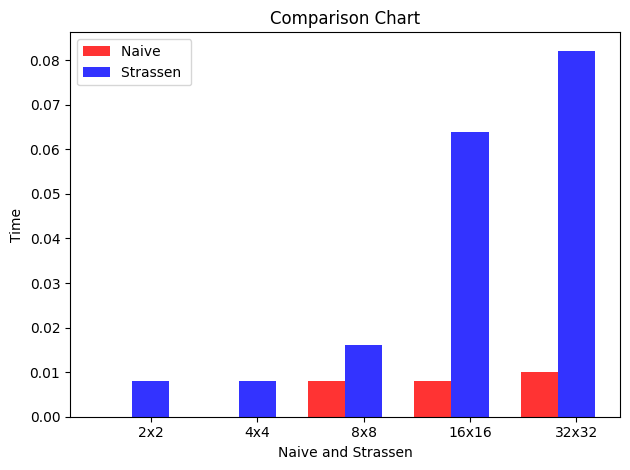

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
data1 = [0, 0, 0.007997512817382812, 0.008005142211914062, 0.009997512817382812]
data2 = [0.007999181747436523, 0.007999420166015625, 0.015990495681762695, 0.06400012969970703, 0.0821603703498840332]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, data1, bar_width,
alpha=opacity,
color='r',
label='Naive ')
 
rects2 = plt.bar(index + bar_width, data2, bar_width,
alpha=opacity,
color='b',
label='Strassen ')

plt.xlabel('Naive and Strassen')
plt.ylabel('Time')
plt.title('Comparison Chart')
plt.xticks(index + bar_width, ('2x2', '4x4', '8x8', '16x16', '32x32'))
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
import time
import random

def Naive_multiply(x, y):
  return x * y

def karatsuba(x,y):
    if len(str(x)) == 1 or len(str(y)) == 1:
        return x*y
    else:
        n = max(len(str(x)),len(str(y)))
        nby2 = n // 2
        a = x // 10**(nby2)
        b = x % 10**(nby2)
        c = y // 10**(nby2)
        d = y % 10**(nby2)
        ac = karatsuba(a,c)
        bd = karatsuba(b,d)
        ad_plus_bc = karatsuba(a+b,c+d) - ac - bd
        return ac * 10**(2*nby2) + (ad_plus_bc * 10**nby2) + bd
    


def generate(n, N):
  return [random.randint(0, 2**N-1) for i in range(n)]

for N in [64]:
  x_list = generate(10, N)
  y_list = generate(10, N)

st = time.time()
for i in range(len(x_list)):
   karatsuba(x_list[i], y_list[i])
time.sleep(1)
ktime = time.time() - st
print("Karatsuba method time :",ktime)


st1 = time.time()
for i in range(len(x_list)):
  Naive_multiply(x_list[i], y_list[i])
time.sleep(1)
ktime1 = time.time() - st1
print("Naive method time :",ktime1) 


Karatsuba method time : 1.0144152641296387
Naive method time : 1.0066547393798828


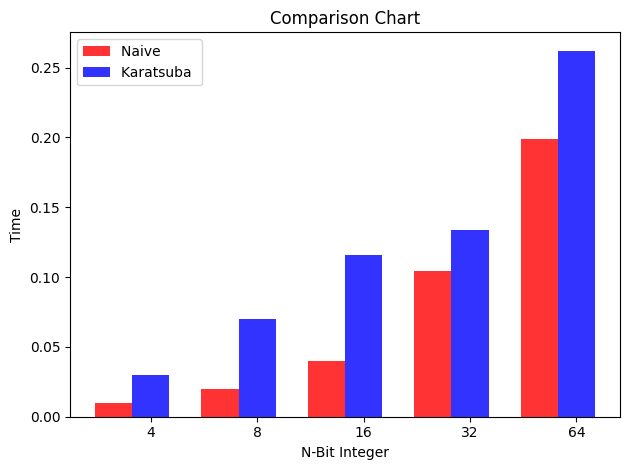

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
data1 = [0.0100122817382812,  0.01997512817382812, 0.04007512817382812, 0.10400514221194062, 0.19907512817382812]
data2 = [0.02999181747436523, 0.06999420166015625, 0.115990495681762695, 0.13400012969970703, 0.2621603703498840332]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, data1, bar_width,
alpha=opacity,
color='r',
label='Naive ')
 
rects2 = plt.bar(index + bar_width, data2, bar_width,
alpha=opacity,
color='b',
label='Karatsuba ')

plt.xlabel('N-Bit Integer')
plt.ylabel('Time')
plt.title('Comparison Chart')
plt.xticks(index + bar_width, ('4', '8', '16', '32', '64'))
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
def MCS(arr):
    n=len(arr)
    sum=0
    maxi=arr[0]
    for i in range(n):
        sum+=arr[i]
        maxi=max(maxi,sum)
        if(sum<0):
            sum=0
    
    return maxi

B = [-2, 11, -4, 13, -5, 2] 
print(MCS(B)) 
B = [1, -3, 4, -2, -1, 6] 
print(MCS(B))

20
7


In [10]:
def lcs(X, Y, m, n):
    L = [[0 for j in range(n+1)] for i in range(m+1)]
    
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1] + 1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])
    
    return L[m][n]

X = "AGGTAB" 
Y = "GXTXAYB"
m = len(X)
n = len(Y)
print("Length of LCS is :",lcs(X, Y, m, n))


Length of LCS is : 4


In [11]:
def lis(arr): 
    n = len(arr) 
    dp = [1] * n 
    for i in range(1, n): 
        for j in range(i): 
            if arr[j] < arr[i]: 
                dp[i] = max(dp[i], dp[j]+1) 
    
    return max(dp) 

arr = [10, 22, 9, 33, 21, 50, 41, 60] 
print(lis(arr))

5


In [13]:
def laslength(A): 
    n = len(A) 
    LIS = [1] * n 
    LDS = [1] * n 
    for j in range(1, n): 
        for i in range(j): 
            if A[i] < A[j]: 
                LIS[j] = max(LIS[j], LIS[i] + 1) 
            elif A[i] > A[j]: 
                LDS[j] = max(LDS[j], LDS[i] + 1) 
    length= 1 
    for i in range(n): 
        if i % 2 == 0: 
            length= max(length, LIS[i] + LDS[i] - 2) 
        else:
            length= max(length, LIS[i] + LDS[i] - 1)
    
    return length 


A = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6, 2, 7] 
print(laslength(A))

7
